In [ ]:
# Nhập các thư viện

import pandas as pd
import numpy as np

# Thư viện Scikit-learn: dành cho SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Thư viện Matplotlib để vẽ biểu đồ
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Thư viện dành cho trực quan hóa dữ liệu thống kê
import seaborn

%matplotlib inline

# Lấy dữ liệu

In [ ]:
data = pd.read_csv('/content/Lab5_creditcard.csv') # Đọc tệp .csv
df = pd.DataFrame(data) # Chuyển đổi dữ liệu thành DataFrame của Pandas


# Trực quan hóa dữ liệu

In [ ]:
df = pd.DataFrame(data) # Chuyển đổi dữ liệu thành DataFrame của Pandas

In [ ]:
df.describe() # Mô tả các đặc điểm thống kê (Tổng, Trung bình, Phương sai, Giá trị nhỏ nhất, Tứ phân vị thứ 1, Tứ phân vị thứ 2, Tứ phân vị thứ 3 và Giá trị lớn nhất)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


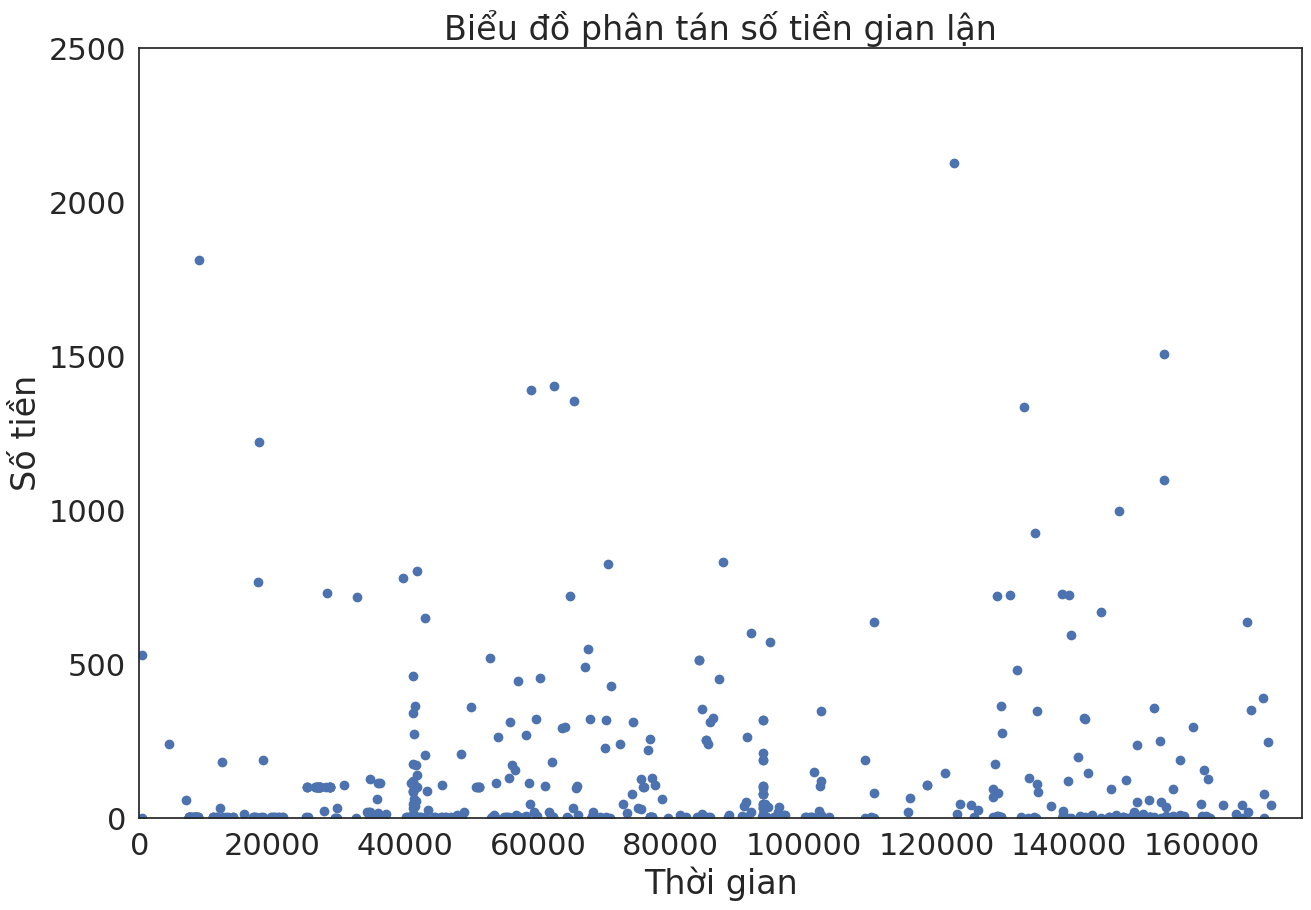

In [ ]:
df_fraud = df[df['Class'] == 1] # Lấy dữ liệu gian lận
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Hiển thị số tiền gian lận theo thời gian
plt.title('Biểu đồ phân tán số tiền gian lận')
plt.xlabel('Thời gian')
plt.ylabel('Số tiền')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Lấy các giao dịch gian lận có số tiền trên 1000
print('Chỉ có ' + str(nb_big_fraud) + ' giao dịch gian lận có số tiền lớn hơn 1000 trên tổng số ' + str(df_fraud.shape[0]) + ' giao dịch gian lận')

Chỉ có 9 giao dịch gian lận có số tiền lớn hơn 1000 trên tổng số 492 giao dịch gian lận


**Unbalanced data**

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('Chỉ có ' + str(number_fraud) + ' giao dịch gian lận trong tập dữ liệu ban đầu, trong khi có ' + str(number_no_fraud) + ' giao dịch không gian lận trong tập dữ liệu.')

Chỉ có 492 giao dịch gian lận trong tập dữ liệu ban đầu, trong khi có 284315 giao dịch không gian lận trong tập dữ liệu.


In [ ]:
print("Độ chính xác của bộ phân loại sẽ là: " + str((284315-492)/284315) + " là tỷ lệ số lượng phân loại đúng trên tổng số bản ghi cần phân loại")

Độ chính xác của bộ phân loại sẽ là: 0.998269524998681 là tỷ lệ số lượng phân loại đúng trên tổng số bản ghi cần phân loại


# Tương quan giữa các đặc trưng


In [ ]:
df_corr = df.corr() # Tính toán hệ số tương quan theo từng cặp, với phương pháp mặc định:
                    # Pearson, Hệ số Tương quan Chuẩn

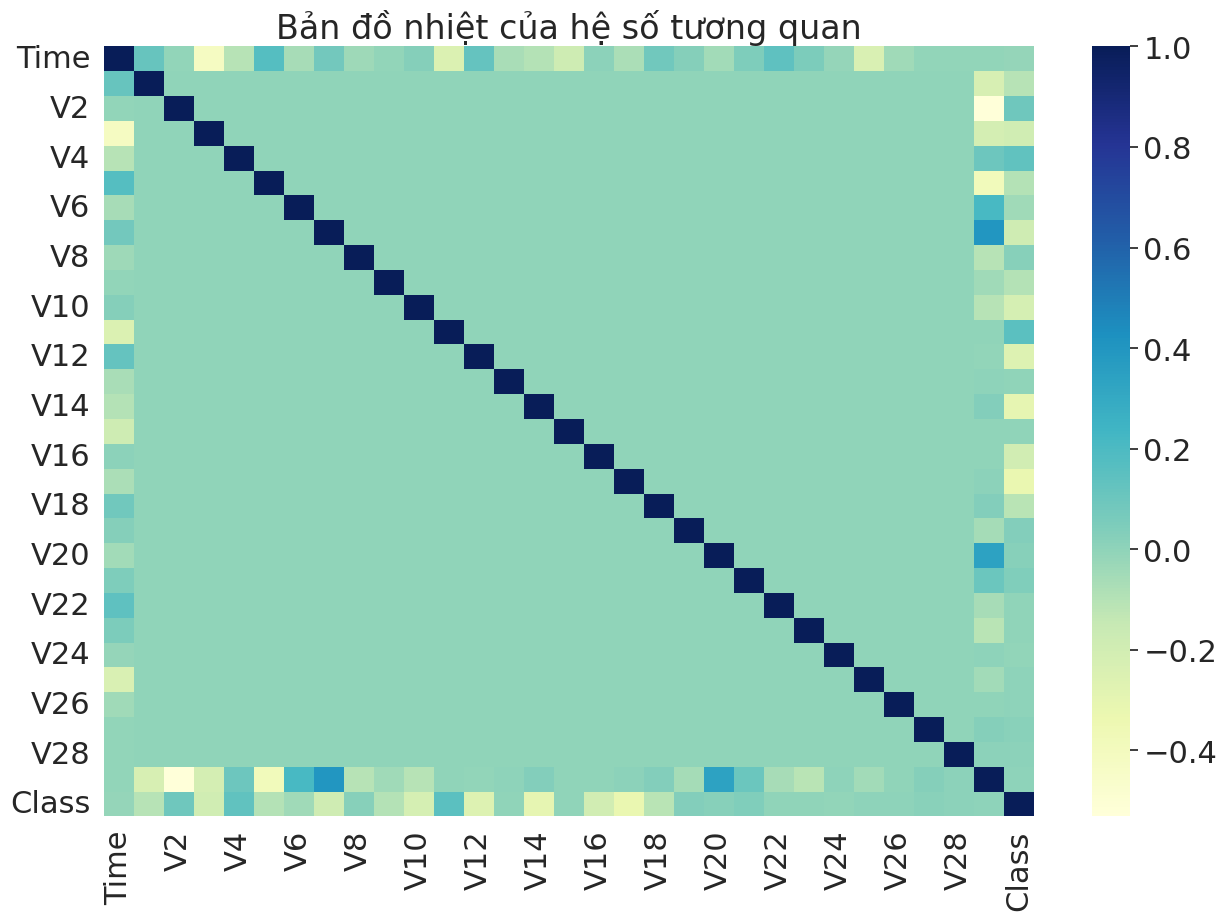

In [ ]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Hiển thị bản đồ nhiệt
seaborn.set(font_scale=2, style='white')

plt.title('Bản đồ nhiệt của hệ số tương quan')
plt.show()

In [ ]:
rank = df_corr['Class'] # Lấy các hệ số tương quan của từng đặc trưng so với đặc trưng 'Class'
df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class', ascending=False) # Sắp xếp theo giá trị tuyệt đối của các hệ số
                                                                   # theo thứ tự giảm dần
df_rank.dropna(inplace=True) # Loại bỏ dữ liệu thiếu (không phải số)

# Lựa chọn dữ liệu


In [ ]:
# Chúng ta chia dữ liệu thành hai nhóm: một tập dữ liệu huấn luyện và một tập dữ liệu kiểm tra

# Đầu tiên, chúng ta xây dựng tập dữ liệu huấn luyện
df_train_all = df[0:150000] # Chúng ta chia đôi tập dữ liệu gốc
df_train_1 = df_train_all[df_train_all['Class'] == 1] # Chúng ta tách dữ liệu thành gian lận và không gian lận
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('Trong tập dữ liệu này, chúng ta có ' + str(len(df_train_1)) + " giao dịch gian lận nên cần lấy số lượng tương tự các giao dịch không gian lận")

df_sample = df_train_0.sample(300)
df_train = pd.concat([df_train_1, df_sample]) # Chúng ta kết hợp các giao dịch gian lận với các giao dịch không gian lận
df_train = df_train.sample(frac=1) # Sau đó, chúng ta xáo trộn tập dữ liệu

Trong tập dữ liệu này, chúng ta có 293 giao dịch gian lận nên cần lấy số lượng tương tự các giao dịch không gian lận


In [ ]:
X_train = df_train.drop(['Time', 'Class'], axis=1) # Loại bỏ các đặc trưng 'Time' (không cần thiết) và 'Class' (nhãn)
y_train = df_train['Class'] # Tạo nhãn của chúng ta
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [ ]:
# với toàn bộ tập dữ liệu kiểm tra để xem mô hình học chính xác hay không ##################
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'], axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [ ]:
X_train_rank = df_train[df_rank.index[1:11]] # Chúng ta lấy 10 đặc trưng có thứ hạng cao nhất
X_train_rank = np.asarray(X_train_rank)

In [ ]:
# với toàn bộ tập dữ liệu kiểm tra để xem mô hình học chính xác hay không ##################
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [ ]:
class_names = np.array(['0', '1']) # Nhãn nhị phân, Class = 1 (gian lận) và Class = 0 (không gian lận)

In [ ]:
# Hàm để vẽ ma trận confusion
def plot_confusion_matrix(cm, classes,
                          title='Ma trận nhầm lẫn',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Nhãn thực')
    plt.xlabel('Nhãn dự đoán')


# Chọn model

In [ ]:
classifier = svm.SVC(kernel='linear') # Chúng ta thiết lập một bộ phân loại SVM, bộ phân loại SVM mặc định (Kernel = Hàm cơ sở xuyên tâm)

In [ ]:
classifier.fit(X_train, y_train) # Sau đó, chúng ta huấn luyện mô hình với tập dữ liệu huấn luyện đã cân bằng.

SVC(kernel='linear')

# Testing model

In [ ]:
prediction_SVM_all = classifier.predict(X_test_all) # Và cuối cùng, chúng ta dự đoán trên tập dữ liệu kiểm tra.

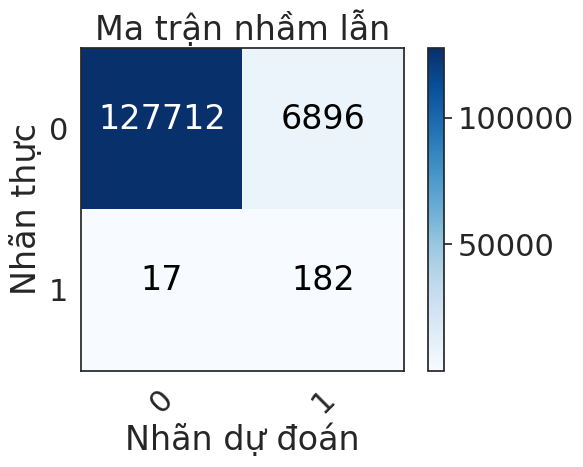

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Our criterion give a result of '
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Our criterion give a result of 0.9214021474885014


In [ ]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 182 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.914572864321608
the accuracy is : 0.948719280156075


 # Models Rank

In [ ]:
classifier.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier.predict(X_test_all_rank) #And finally, we predict our data test.

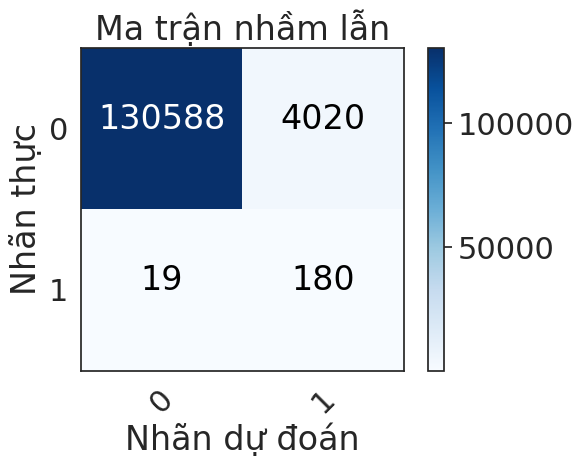

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Tiêu chí của chúng ta cho ra kết quả là '
      + str(((cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1] / (cm[1][0] + cm[1][1])) / 5))

Tiêu chí của chúng ta cho ra kết quả là 0.9176258200212006


In [ ]:
print('Chúng ta đã phát hiện ' + str(cm[1][1]) + ' giao dịch gian lận / ' + str(cm[1][1] + cm[1][0]) + ' tổng số giao dịch gian lận.')
print('\nVì vậy, xác suất phát hiện một giao dịch gian lận là ' + str(cm[1][1] / (cm[1][1] + cm[1][0])))
print("Độ chính xác là: " + str((cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Chúng ta đã phát hiện 180 giao dịch gian lận / 199 tổng số giao dịch gian lận.

Vì vậy, xác suất phát hiện một giao dịch gian lận là 0.9045226130653267
Độ chính xác là: 0.9700386478446965


# Cân bằng lại trọng số của các lớp:


In [ ]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [ ]:
classifier_b.fit(X_train, y_train) # Sau đó, chúng ta huấn luyện mô hình với tập dữ liệu huấn luyện đã cân bằng.

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

# Testing model

In [ ]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) # Chúng ta dự đoán trên toàn bộ tập dữ liệu.


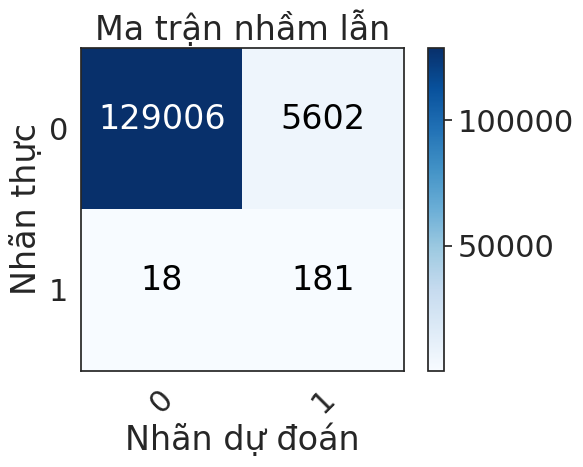

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Tiêu chí của chúng ta cho ra kết quả là '
      + str(((cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1] / (cm[1][0] + cm[1][1])) / 5))

Tiêu chí của chúng ta cho ra kết quả là 0.9193003449972197


In [ ]:
print('Chúng ta đã phát hiện ' + str(cm[1][1]) + ' giao dịch gian lận / ' + str(cm[1][1] + cm[1][0]) + ' tổng số giao dịch gian lận.')
print('\nVì vậy, xác suất phát hiện một giao dịch gian lận là ' + str(cm[1][1] / (cm[1][1] + cm[1][0])))
print("Độ chính xác là: " + str((cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Chúng ta đã phát hiện 181 giao dịch gian lận / 199 tổng số giao dịch gian lận.

Vì vậy, xác suất phát hiện một giao dịch gian lận là 0.9095477386934674
Độ chính xác là: 0.9583107702122293


 # Models Rank

In [ ]:
classifier_b.fit(X_train_rank, y_train) # Then we train our model, with our balanced data train.
prediction_SVM = classifier_b.predict(X_test_all_rank) #And finally, we predict our data test.

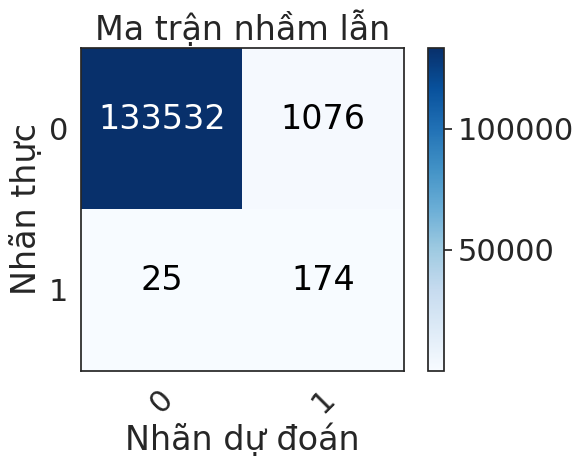

In [ ]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [ ]:
print('Tiêu chí của chúng ta cho ra kết quả là '
      + str(((cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1] / (cm[1][0] + cm[1][1])) / 5))

Tiêu chí của chúng ta cho ra kết quả là 0.8978640411027967


In [ ]:
print('Chúng ta đã phát hiện ' + str(cm[1][1]) + ' giao dịch gian lận / ' + str(cm[1][1] + cm[1][0]) + ' tổng số giao dịch gian lận.')
print('\nVì vậy, xác suất phát hiện một giao dịch gian lận là ' + str(cm[1][1] / (cm[1][1] + cm[1][0])))
print("Độ chính xác là: " + str((cm[0][0] + cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))




Chúng ta đã phát hiện 174 giao dịch gian lận / 199 tổng số giao dịch gian lận.

Vì vậy, xác suất phát hiện một giao dịch gian lận là 0.8743718592964824
Độ chính xác là: 0.9918327683280542
